In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Transrate scores from Trinity assemblies of MMETSP data

* Transrate score calculated using trimmed reads, not digitally-normalized
* Overall assembly score represents "geometric mean of all contig scores multiplied by the proportion of input reads that provide positive support for the assembly"
* Metrics: http://hibberdlab.com/transrate/metrics.html

In [3]:
df = pd.DataFrame()
data_frame = df.from_csv('../assembly_evaluation_data/transrate_scores.csv')

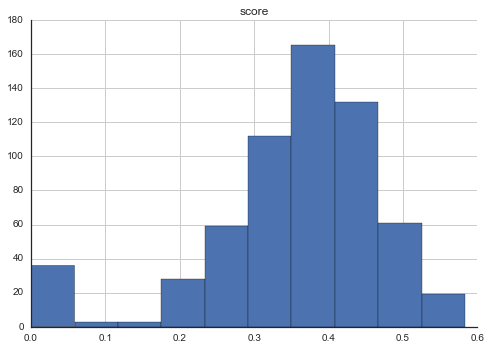

In [7]:
score=pd.DataFrame.hist(data_frame,column="score")
sns.set_style("white")
sns.despine()

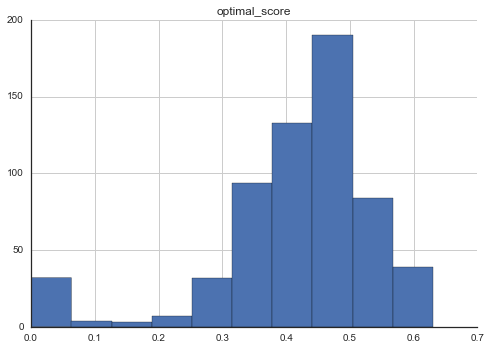

In [8]:
optimal_scores=pd.DataFrame.hist(data_frame,column="optimal_score")
sns.set_style("white")
sns.despine()

# BUSCO scores

* Eukaryota database used with 429 genes
* ‘Complete’ lengths are within two standard deviations of the BUSCO group mean length
* Website: http://busco.ezlab.org/
* [Simão et al. 2015](http://busco.ezlab.org/files/BUSCO-Simao-Waterhouse-Bioinformatics-2015.pdf)
* Supplemental materials: http://busco.ezlab.org/files/BUSCO-SOM.pdf

In [11]:
df = pd.DataFrame()
data_frame = df.from_csv('../assembly_evaluation_data/busco_scores_MMETSP.csv')
data_frame.head()

,Complete,Fragmented,Missing,Total,Complete_BUSCO_perc
Symbiodinium_sp._SRR1300265,191,55,183,429,0.445221
Ditylum_brightwellii_SRR1300294,183,80,166,429,0.426573
uncultured_eukaryote_SRR1300277,238,77,114,429,0.554779
Symbiodinium_kawagutii_SRR1300304,28,41,360,429,0.065268
Bathycoccus_prasinos_SRR1300250,259,42,128,429,0.603730


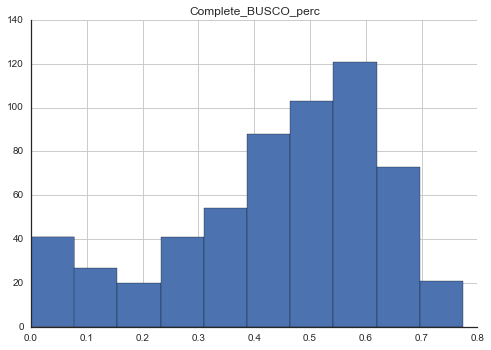

In [12]:
busco_scores=pd.DataFrame.hist(data_frame,column="Complete_BUSCO_perc")
sns.set_style("white")
sns.despine()

# Comparative Transrate metrics

* Proportion of references with a CRB-BLAST hit 
* Reciprocal best hits where the top match in one direction is the same as the top match in the other direction. 
* Selects all alignments with e-values below the cutoff for each length as high-confidence predicted homologs
* Metrics: http://hibberdlab.com/transrate/metrics.html

In [14]:
dib_v_ncgr="../assembly_evaluation_data/transrate_reference_scores_cds.csv"
ncgr_v_dib="../assembly_evaluation_data/transrate_reverse_scores_cds.csv"
data_frame1_cds=df.from_csv(dib_v_ncgr)
data_frame2_cds=df.from_csv(ncgr_v_dib)

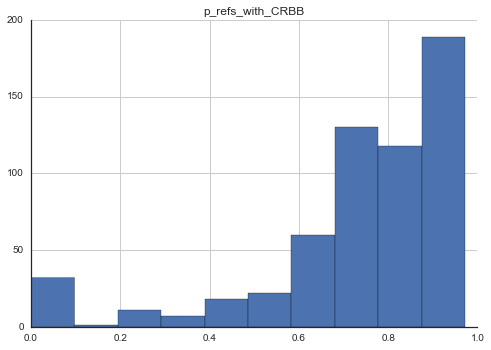

In [15]:
# dib v. ncgr
CRBB_refs=pd.DataFrame.hist(data_frame1_cds,column="p_refs_with_CRBB")
sns.set_style("white")
sns.despine()

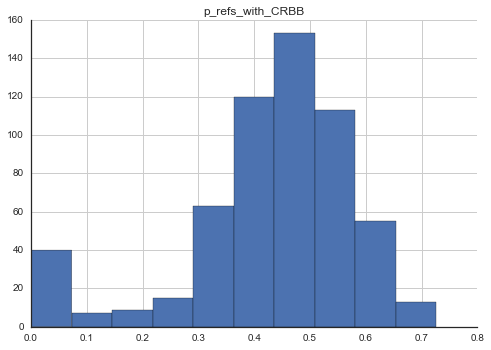

In [16]:
# ncgr v. dib
CRBB_reverse=pd.DataFrame.hist(data_frame2_cds,column="p_refs_with_CRBB")
sns.set_style("white")
sns.despine()

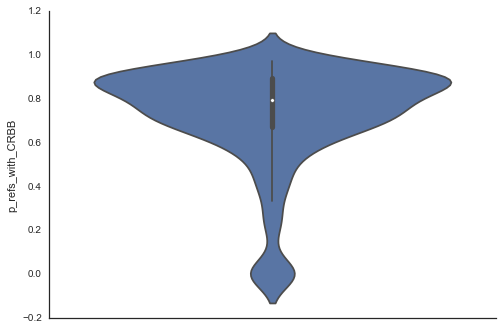

In [17]:
# dib_v_ncgr
sns.violinplot(None,data_frame1_cds["p_refs_with_CRBB"])
sns.set_style("white")
sns.despine()

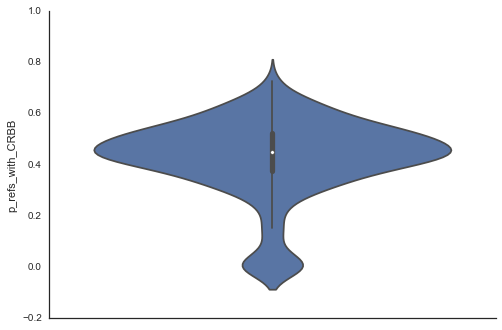

In [18]:
# ncgr_v_dib
sns.violinplot(None,data_frame2_cds["p_refs_with_CRBB"])
sns.set_style("white")
sns.despine()

In [21]:
dib_v_ncgr="../assembly_evaluation_data/transrate_reference_scores_nt.csv"
ncgr_v_dib="../assembly_evaluation_data/transrate_reverse_scores_nt.csv"
data_frame1_nt=df.from_csv(dib_v_ncgr)
data_frame2_nt=df.from_csv(ncgr_v_dib)

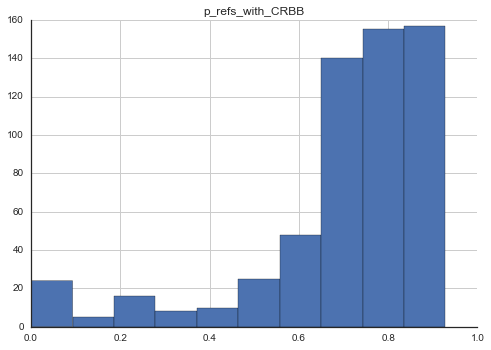

In [22]:
# dib v. ncgr
CRBB_refs=pd.DataFrame.hist(data_frame1_nt,column="p_refs_with_CRBB")
sns.set_style("white")
sns.despine()

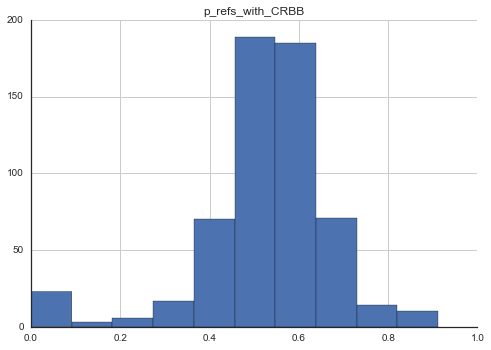

In [23]:
# ncgr v. dib
CRBB_reverse=pd.DataFrame.hist(data_frame2_nt,column="p_refs_with_CRBB")
sns.set_style("white")
sns.despine()

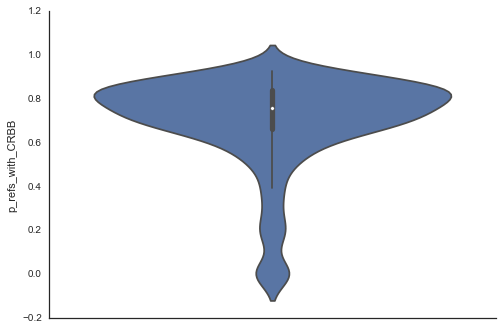

In [24]:
# dib_v_ncgr
sns.violinplot(None,data_frame1_nt["p_refs_with_CRBB"])
sns.set_style("white")
sns.despine()

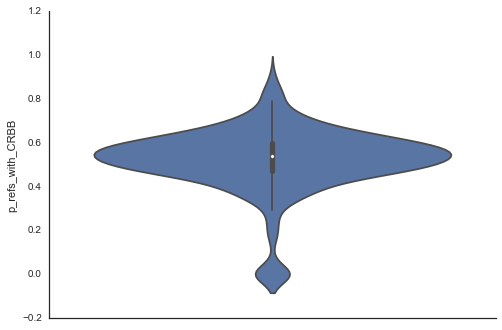

In [25]:
# ncgr_v_dib
sns.violinplot(None,data_frame2_nt["p_refs_with_CRBB"])
sns.set_style("white")
sns.despine()

Why are kernel densities below zero? See explanation here:
http://stackoverflow.com/questions/28115637/how-to-better-fit-seaborn-violinplots